In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [95]:
# load data

advertising = pd.read_csv('./data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()
advertising.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


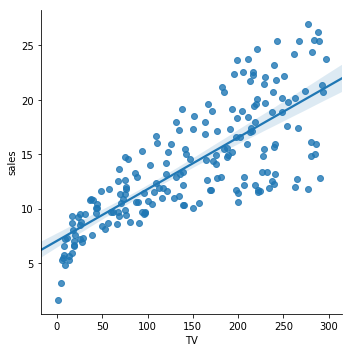

In [96]:
sns.lmplot('TV', 'sales', data = advertising)

In [105]:
tv = advertising['TV'].values
sales = advertising['sales'].values

beta1 = ((tv - tv.mean()) * (sales - sales.mean())).sum() / ((tv - tv.mean()) ** 2).sum()
beta0 = sales.mean() - beta1 * tv.mean()

rss = np.sum((beta0 + beta1 * tv - sales) ** 2) / 1000

print(f'beta1: {beta1}, beta0: {beta0}')
print(f'rss: {rss}')

beta1: 0.047536640433019736, beta0: 7.0325935491276965
rss: 2.1025305831313514


Text(0,0.5,'$\\beta_{1}$')

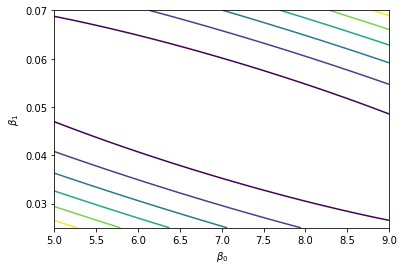

In [107]:
# plot contour and 3d plots of rss
    
beta0 = np.linspace(5, 9, 100)
beta1 = np.linspace(0.025, 0.07, 100)

beta0, beta1 = np.meshgrid(beta0, beta1)

rss = np.zeros_like(beta0)
for i in range(tv.size):
    rss += (beta0 + beta1 * tv[i] - sales[i]) ** 2 / 1000
    
plt.contour(beta0, beta1, rss)

plt.xlabel(r'$\beta_{0}$')
plt.ylabel(r'$\beta_{1}$')